#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing Dataset

In [2]:
dataset = pd.read_csv('weatherAUS.csv')
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [3]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [4]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [5]:
Y = Y.reshape(-1,1)

#Dealing with invalid Data

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [7]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [8]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


#Encoding Dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [10]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [11]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [12]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


#Splitting Dataset into Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [17]:
print(Y_train)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Training Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

<ipython-input-18-92250276c12a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=0)

In [19]:
classifier_rf.score(X_train,Y_train)

0.9999312525780283

In [20]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
print(y_pred_rf)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [22]:
print(Y_test_rf)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [23]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)

In [24]:
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [25]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No               Yes
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


#Calculating Accuracy

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_rf,y_pred_rf)

0.8521930427608965

In [27]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_rf,y_pred_rf)
print(cm)


[[21714  1012]
 [ 3288  3078]]


Text(0, 0.5, 'True label')

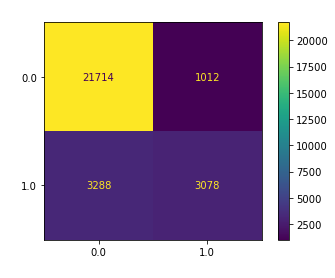

In [28]:
matrix=plot_confusion_matrix(classifier_rf,X_test,Y_test)
matrix.ax_.set_title('Confusion Matrix',color='white')
plt.xlabel('Predicted label',color='white')
plt.ylabel('True label',color='white')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

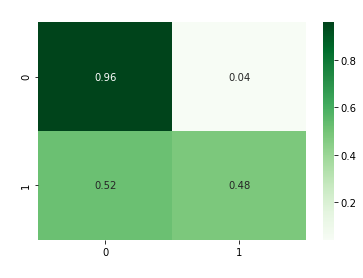

In [29]:
import seaborn as sns
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
sns.heatmap(cm_normalized,cmap='Greens',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted label',color='white')
plt.ylabel('Actual label',color='white')
plt.title('Normalized Confusion Matrix',color='white')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22726
         Yes       0.75      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [31]:
from sklearn.linear_model import LogisticRegression  
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [32]:
classifier_lr.score(X_train,Y_train)

0.8417778083321875

In [33]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
print(y_pred_lr)

['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [35]:
print(Y_test_lr)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [36]:
y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)

In [37]:
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [38]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes               Yes
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_lr,y_pred_lr)

0.8428433933727485

In [40]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm)


[[21595  1131]
 [ 3441  2925]]


Text(0, 0.5, 'True label')

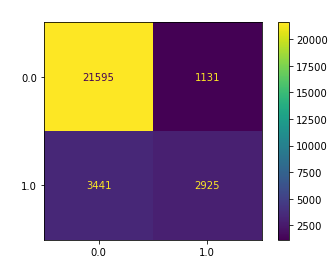

In [41]:
matrix=plot_confusion_matrix(classifier_lr,X_test,Y_test)
matrix.ax_.set_title('Confusion Matrix',color='white')
plt.xlabel('Predicted label',color='white')
plt.ylabel('True label',color='white')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

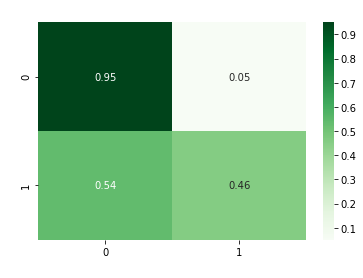

In [42]:
import seaborn as sns
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
sns.heatmap(cm_normalized,cmap='Greens',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted label',color='white')
plt.ylabel('Actual label',color='white')
plt.title('Normalized Confusion Matrix',color='white')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22726
         Yes       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [44]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
classifier_dt.score(X_train,Y_train)

0.9999398460057748

In [46]:
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
print(y_pred_dt)

['No' 'Yes' 'No' ... 'Yes' 'Yes' 'No']


In [48]:
print(Y_test_dt)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [49]:
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)

In [50]:
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [51]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes               Yes
2                    No                No
3                    No               Yes
4                    No                No
...                 ...               ...
29087                No                No
29088                No                No
29089               Yes               Yes
29090                No               Yes
29091                No                No

[29092 rows x 2 columns]


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_dt,y_pred_dt)

0.7883266877492094

In [53]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm)

[[19621  3105]
 [ 3053  3313]]


Text(0, 0.5, 'True label')

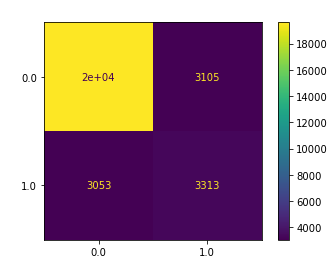

In [54]:
matrix=plot_confusion_matrix(classifier_dt,X_test,Y_test)
matrix.ax_.set_title('Confusion Matrix',color='white')
plt.xlabel('Predicted label',color='white')
plt.ylabel('True label',color='white')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

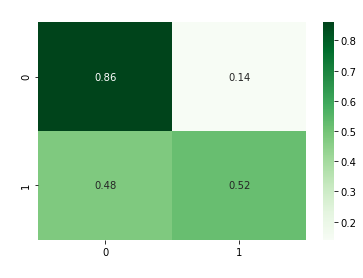

In [55]:
import seaborn as sns
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
sns.heatmap(cm_normalized,cmap='Greens',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted label',color='white')
plt.ylabel('Actual label',color='white')
plt.title('Normalized Confusion Matrix',color='white')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

          No       0.87      0.86      0.86     22726
         Yes       0.52      0.52      0.52      6366

    accuracy                           0.79     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.79      0.79      0.79     29092



In [57]:
!pip install lightgbm

In [58]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state = 0)
classifier_lgbm.fit(X_train, Y_train)

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier(random_state=0)

In [59]:
classifier_lgbm.score(X_train,Y_train)

0.8643527430221367

In [60]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
print(y_pred_lgbm)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [62]:
print(Y_test_lgbm)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [63]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)

In [64]:
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [65]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_lgbm,y_pred_lgbm)

0.8562147669462395

In [67]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm)

[[21620  1106]
 [ 3077  3289]]


Text(0, 0.5, 'True label')

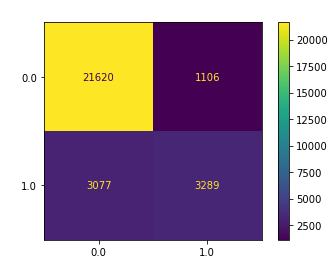

In [68]:
matrix=plot_confusion_matrix(classifier_lgbm,X_test,Y_test)
matrix.ax_.set_title('Confusion Matrix',color='white')
plt.xlabel('Predicted label',color='white')
plt.ylabel('True label',color='white')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

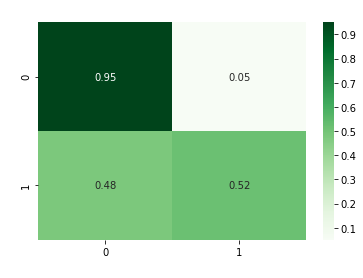

In [69]:
import seaborn as sns
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
sns.heatmap(cm_normalized,cmap='Greens',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted label',color='white')
plt.ylabel('Actual label',color='white')
plt.title('Normalized Confusion Matrix',color='white')

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

          No       0.88      0.95      0.91     22726
         Yes       0.75      0.52      0.61      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



In [71]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [72]:
classifier_nb.score(X_train,Y_train)

0.8022308538429809

In [73]:
y_pred_nb = le6.inverse_transform(np.array(classifier_nb.predict(X_test),dtype=int))
Y_test_nb = le6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\saive\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [74]:
print(y_pred_nb)

['No' 'No' 'No' ... 'Yes' 'No' 'No']


In [75]:
print(Y_test_nb)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [76]:
y_pred_nb = y_pred_nb.reshape(-1,1)
Y_test_nb = Y_test_nb.reshape(-1,1)

In [77]:
df = np.concatenate((Y_test_nb,y_pred_nb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [78]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes               Yes
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_nb,y_pred_nb)

0.8031417571841056

In [80]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_nb,y_pred_nb)
print(cm)

[[19744  2982]
 [ 2745  3621]]


Text(0, 0.5, 'True label')

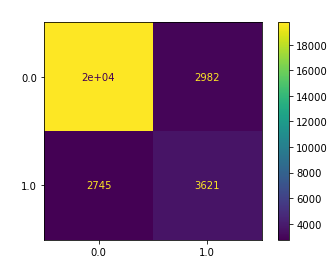

In [81]:
matrix=plot_confusion_matrix(classifier_nb,X_test,Y_test)
matrix.ax_.set_title('Confusion Matrix',color='white')
plt.xlabel('Predicted label',color='white')
plt.ylabel('True label',color='white')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

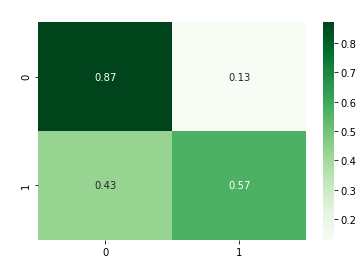

In [82]:
import seaborn as sns
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
sns.heatmap(cm_normalized,cmap='Greens',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted label',color='white')
plt.ylabel('Actual label',color='white')
plt.title('Normalized Confusion Matrix',color='white')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

          No       0.88      0.87      0.87     22726
         Yes       0.55      0.57      0.56      6366

    accuracy                           0.80     29092
   macro avg       0.71      0.72      0.72     29092
weighted avg       0.81      0.80      0.80     29092

